 # 1.Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Loading Dataset

**Dataset source**="https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset"

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


In [3]:
url=('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')
df = pd.read_excel(url)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

 # 3. Data Cleaning

**Dropping Irrelevant Columns**

Before proceeding with analysis, we will drop columns that have no direct relevance or correlation to our dataset.

In [5]:
redundancy_check=(df['Churn Label']==df['Churn Value']).all()
if redundancy_check:
    print('Values are redundant')
else:
    print('Both Columns Values are not redundant')

Both Columns Values are not redundant


In [6]:
columns_to_drop=['Churn Label','Latitude','Longitude']
df.drop(columns_to_drop, axis=1, inplace=True)

To adhere to standard practices, we will convert column names to follow proper naming conventions.

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   object 
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  tenure_months      7043 non-null   int64  
 12  phone_service      7043 non-null   object 
 13  multiple_lines     7043 non-null   object 
 14  internet_service   7043 non-null   object 
 15  online_security    7043 non-null   object 
 16  online_backup      7043 

**Information that we got from info() method is:**

1. There is need to address missing values in 'Churn Reason' to understanding customer behavior.
2. Converting Total Charges to float64 facilitates numerical operations on financial data.
3. Converting indicator columns to 0/1 enhances the dataset's suitability for machine learning algorithms.

In [9]:
#checking value count in these columns
column_list = ['gender', 'senior_citizen', 'partner', 'dependents', 
            'phone_service', 'multiple_lines', 'internet_service', 
            'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 
            'paperless_billing', 'payment_method', 'churn_value', 
            'churn_reason', 'country', 'state', 'city', 'zip_code']

#we use for loop to iterate over a list of column list
for col in column_list:
     print(f'\nValue Counts | column = {col}')
     print(df[col].value_counts(normalize=True, dropna=False))


Value Counts | column = gender
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Value Counts | column = senior_citizen
senior_citizen
No     0.837853
Yes    0.162147
Name: proportion, dtype: float64

Value Counts | column = partner
partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Value Counts | column = dependents
dependents
No     0.76899
Yes    0.23101
Name: proportion, dtype: float64

Value Counts | column = phone_service
phone_service
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

Value Counts | column = multiple_lines
multiple_lines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

Value Counts | column = internet_service
internet_service
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

Value Counts | column = online_security
online_security
No                     0.496663
Yes     

**Notes on Value Counts**
1. (0/1) Encoding:we will convert attributes such as Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing to binary format (0/1).

2. Churn Reason Grouping: Categorize Churn Reason into groups: Customer Service, Product/Network, Pricing, Moved, and Unknown.

3. One-Hot Encoding:use of one hot encoding to Transform Gender, Contract, Payment Method, and Churn Reason Group using one-hot encoding.

4. City Distribution:Wide city distribution with < 10% in major cities suggests a rural telecom focus.

5. The dataset appears clean with no corrupt values or missing data (NaNs), ensuring reliability for analysis.

# 4. Data Preparation

### Replace_yes_no

In [10]:
# Define the function
def replace_yes_no(df):
    bool_list = ['senior_citizen', 'partner', 'dependents', 'phone_service', 
                 'multiple_lines', 'internet_service', 'online_security', 
                 'online_backup', 'device_protection', 'tech_support', 
                 'streaming_tv', 'streaming_movies', 'paperless_billing']
    for col in bool_list:
        df.replace({col : { 'Yes' : 1, 'No' : 0, 'No phone service' : 0, 
                            'No internet service' : 0}}, inplace=True)
    return df

# Apply the function to your original DataFrame
df = replace_yes_no(df)

### group_churn_reason

In [11]:
# Define the function
def group_churn_reason(df):

    reason_map = {'Attitude of support person': 'Cust Service',
                  'Attitude of service provider': 'Cust Service', 
                  'Service dissatisfaction': 'Cust Service', 
                  'Lack of self-service on Website': 'Cust Service', 
                  'Poor expertise of phone support': 'Cust Service', 
                  'Poor expertise of online support': 'Cust Service', 
                  'Competitor offered higher download speeds': 'Product', 
                  'Competitor offered more data': 'Product', 
                  'Competitor had better devices': 'Product', 
                  'Network reliability': 'Product', 
                  'Product dissatisfaction': 'Product', 
                  'Limited range of services': 'Product', 
                  'Competitor made better offer': 'Pricing', 
                  'Price too high': 'Pricing', 
                  'Extra data charges': 'Pricing', 
                  'Long distance charges': 'Pricing', 
                  'Lack of affordable download/upload speed': 'Pricing', 
                  'Moved': 'Moved', 
                  'Deceased': 'Moved',
                  "Don't know": 'Unknown'}

    df['churn_rsn_grp'] = df['churn_reason'].map(reason_map)
    return df

# Apply the function to your original DataFrame
df = group_churn_reason(df)

In [12]:
def impute_total_charges(df):
    
    non_numeric_mask = ~df['total_charges'].apply(lambda x: isinstance(x, (int, float)))
    non_numeric_count = non_numeric_mask.sum()
    
    df.loc[non_numeric_mask, 'total_charges'] = df.loc[non_numeric_mask, 'tenure_months'] * df.loc[non_numeric_mask, 'monthly_charges']
    df['total_charges'] = df['total_charges'].astype(float)
    
    print(f'Imputed {non_numeric_count} rows of non-numeric total_charges')
    
    return df

## OneHotEncoding Technique

In [13]:
def ohe_categories(df):
    
    # create list of multi-class variables for one-hot encoding
    categoricals = ['gender', 'internet_service', 'contract', 'payment_method', 
                    'churn_rsn_grp']

    # create one-hot encoded dummy variables for categoricals
    df_ohe = pd.get_dummies(df[categoricals], drop_first=False, dtype=int)
    df_ohe.rename(
        columns={'gender_Male' : 'gender_male',
                 'gender_Female' : 'gender_female', 
                 'internet_service_0' : 'internet_svc_none', 
                 'internet_service_DSL' : 'internet_svc_dsl', 
                 'internet_service_Fiber optic' : 'internet_svc_fiber', 
                 'contract_Month-to-month' : 'contract_mtm', 
                 'contract_One year' : 'contract_1yr', 
                 'contract_Two year' : 'contract_2yr', 
                 'payment_method_Bank transfer (automatic)' : 'pmt_meth_bank_trx_auto', 
                 'payment_method_Credit card (automatic)' : 'pmt_meth_cc_auto', 
                 'payment_method_Electronic check' : 'pmt_meth_echeck', 
                 'payment_method_Mailed check' : 'pmt_meth_mail_check', 
                 'churn_rsn_grp_Cust Service' : 'churn_rsn_grp_cust_svc',                             
                 'churn_rsn_grp_Moved' : 'churn_rsn_grp_moved', 
                 'churn_rsn_grp_Pricing' : 'churn_rsn_grp_pricing', 
                 'churn_rsn_grp_Product' : 'churn_rsn_grp_product', 
                 'churn_rsn_grp_Unknown' : 'churn_rsn_grp_unknown'
                }, inplace=True)
    
    # concatenate OHE with original df, and drop original category columns
    df = pd.concat([df, df_ohe], axis=1)
    df.drop(categoricals, axis=1, inplace=True)
    
    return df

# Apply the function to your original DataFrame
df = ohe_categories(df)

# 5. Exploratory Data Analysis

## Understanding the Churns

To build a model, we need to understand the factors impacting these churns. Let's deepdive into this

In [14]:
data_corr = df

In [15]:
data_corr['churn_reason'] = data_corr['churn_reason'].map({'Yes': 1, 'No': 0})

In [16]:
data_dummies = pd.get_dummies(data_corr[['phone_service', 'multiple_lines', 'online_security', 'online_backup', 
                                         'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                                         'monthly_charges', 'churn_value', 'churn_score', 'cltv', 'gender_female',
                                         'gender_male','internet_svc_dsl', 'internet_svc_fiber','internet_svc_none','contract_mtm',
                                         'contract_1yr', 'contract_2yr', 'pmt_meth_bank_trx_auto', 'pmt_meth_cc_auto', 'pmt_meth_echeck',
                                         'pmt_meth_mail_check', 'churn_rsn_grp_cust_svc', 'churn_rsn_grp_moved', 'churn_rsn_grp_pricing','churn_rsn_grp_product',
       'churn_rsn_grp_unknown']])
data_dummies = data_dummies.astype(int)
data_dummies.head()

,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,...,contract_2yr,pmt_meth_bank_trx_auto,pmt_meth_cc_auto,pmt_meth_echeck,pmt_meth_mail_check,churn_rsn_grp_cust_svc,churn_rsn_grp_moved,churn_rsn_grp_pricing,churn_rsn_grp_product,churn_rsn_grp_unknown
0,1,0,1,1,0,0,0,0,1,53,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,70,...,0,0,0,1,0,0,1,0,0,0
2,1,1,0,0,1,0,1,1,1,99,...,0,0,0,1,0,0,1,0,0,0
3,1,1,0,0,1,1,1,1,1,104,...,0,0,0,1,0,0,1,0,0,0
4,1,1,0,1,1,0,1,1,1,103,...,0,1,0,0,0,0,0,0,1,0


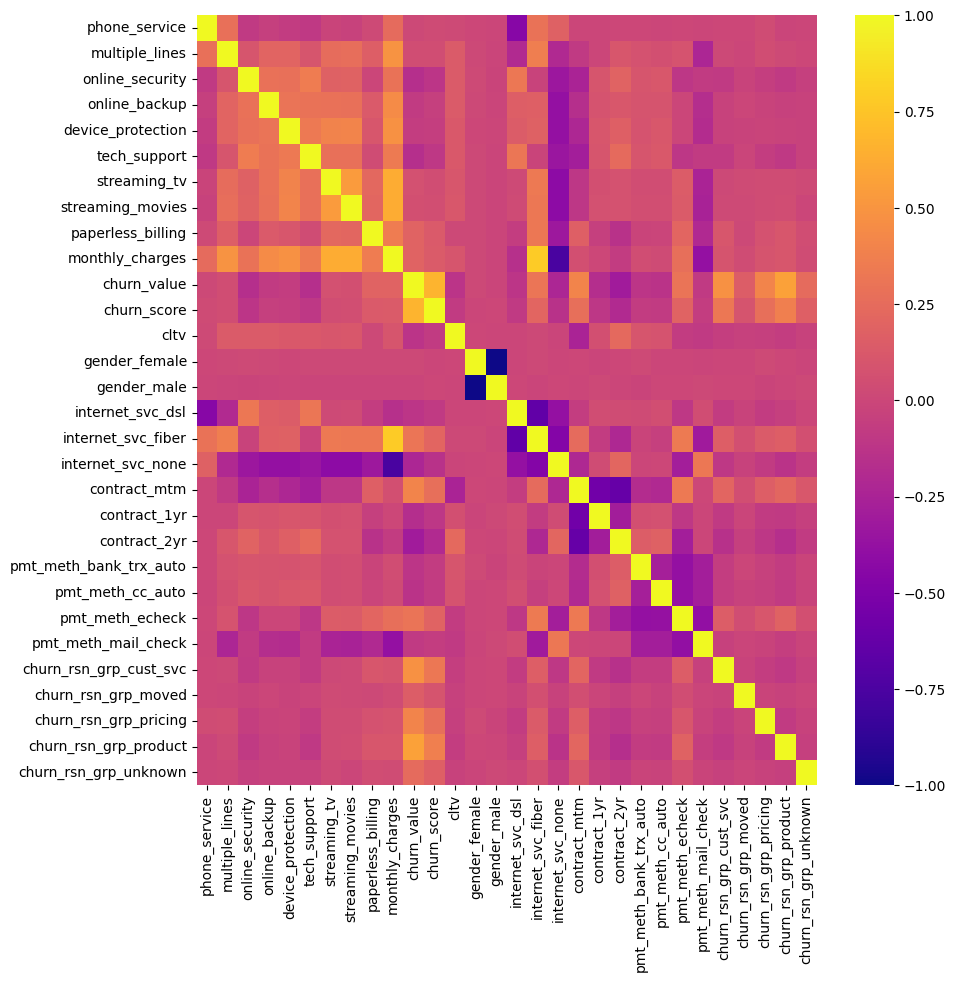

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_dummies.corr(), annot=False, cmap='plasma')
plt.show()

In [18]:
fig = px.histogram(df, 
                   x="tenure_months", 
                   color="churn_value",
                   marginal="box",
                   nbins=20,
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   title='Tenure Months Distribution')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

In [19]:
# Create a new column 'contract_type' that indicates the contract type for each row
df['contract_type'] = np.where(df['contract_mtm'] == 1, 'MTM',
                               np.where(df['contract_1yr'] == 1, '1 Year', '2 Year'))

# Now you can pass 'contract_type' as the color argument
fig = px.histogram(df, x="churn_value", color="contract_type", barmode="group",
                   color_discrete_sequence=px.colors.qualitative.Safe,
                   title="Number of customers by contract type")
fig.update_layout(width=950, height=700, bargap=0.5)
fig.show()

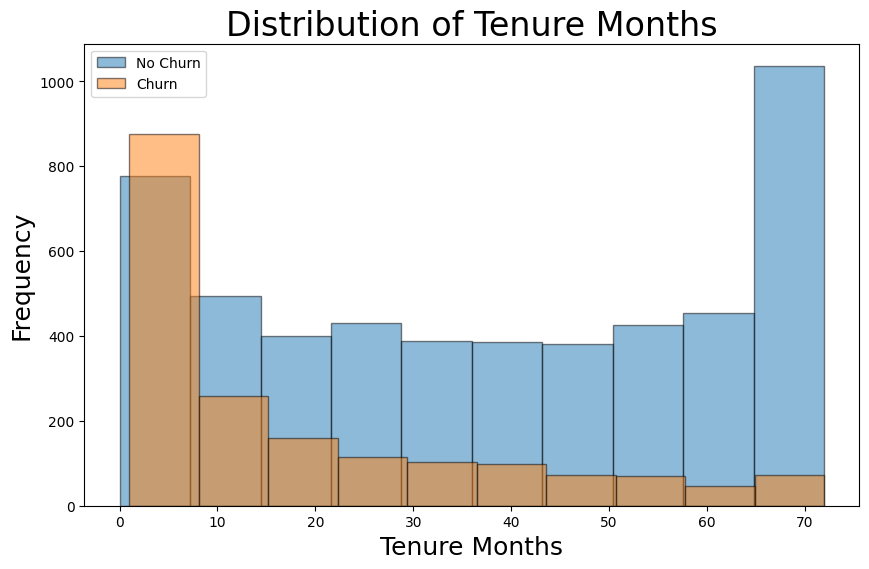

In [20]:
# histogram of the height
df[df['churn_value'] == 0].tenure_months.plot(kind='hist', color='tab:blue', edgecolor='black', alpha=0.5, figsize=(10,6))
df[df['churn_value'] == 1].tenure_months.plot(kind='hist', color='tab:orange', edgecolor='black', alpha=0.5, figsize=(10,6))
plt.legend(labels=['No Churn', 'Churn'])
plt.title('Distribution of Tenure Months', size=24)
plt.xlabel('Tenure Months', size=18)
plt.ylabel('Frequency', size=18)
plt.tight_layout
plt.show()

In [21]:
fig = px.bar(data_dummies.corr()['churn_value'].sort_values(ascending = False), 
             color = 'value')
fig.show()

## Customer's Journey with us

In [22]:
df['internet_service'] = np.select(
    [(df['internet_svc_none'] == 1), (df['internet_svc_dsl'] == 1), (df['internet_svc_fiber'] == 1)],
    ['None', 'DSL', 'Fiber']
)

fig = px.pie(df.groupby(['internet_service', 'churn_value'])['customerid'].count().reset_index(), 
             values='customerid', 
             facet_col = 'churn_value',
             names='internet_service',
             color_discrete_sequence=px.colors.qualitative.Set2,
             title = 'What type of internet was connected to the clients who left the service?')
fig.show()

It seems the fiber connection is better than cable connection, still people using this connection is leaving.

In [23]:
fig = px.bar(df.groupby(['internet_service', 'tech_support', 'churn_value'])['customerid'].count().reset_index(),
             x="internet_service",
             y="customerid",
             color="tech_support",
             text='customerid',
             barmode="group",
             color_continuous_scale="Earth"
            )
fig.show()

Among customers using fiber optics Internet, those who have access to connected tech support exhibit a lower churn rate. In other words, having tech support available seems to positively impact customer retention.

In [24]:
grouped_data = df.groupby('senior_citizen')['customerid'].count().reset_index()
grouped_data.columns = ['Senior Citizen', 'Count']
fig = px.bar(grouped_data,
             x='Senior Citizen',
             y='Count',
             text='Count',
             labels={'Senior Citizen': 'Senior Citizen Status', 'Count': 'Number of Customers'},
             title='Number of Customers by Senior Citizen Status'
            )
fig.show()

In [25]:
fig = px.bar(df.groupby(['senior_citizen','partner','dependents'])['customerid'].count().reset_index(),
             x="senior_citizen",
             y="customerid", 
             color="partner",
             facet_row="dependents"
            )
fig.show()

## Analysis and Conclusions

### Tech Support, Online Security, and Online Backup Services
- The absence of services like "Tech Support," "Online Security," and "Online Backup" correlates with higher churn rates.
- Customers without these services are more likely to leave.

### Fiber Optic Internet
- Customers using "Fiber Optic Internet" show a higher likelihood of churning.
- Despite the high speed of fiber optic internet, its users are more prone to leave, requiring further investigation into the underlying causes.
- Customers using fiber optic internet and who have access to tech support exhibit lower churn rates, indicating the positive impact of tech support on customer retention.

### Payment Methods
- Automatic payment methods correlate with lower churn rates.
- Electronic and mailed checks show higher churn rates, especially among customers using fiber optic and DSL internet services.

### Gender and Churn
- There is no significant connection between gender and churn rates.

### Senior Citizens
- Senior citizens have nearly double the churn rate compared to non-senior citizens, despite representing a smaller portion of the customer base.
- This suggests that senior citizens may need more targeted retention strategies.


In [26]:
df = df.drop(['country','state','count','zip_code','churn_reason','city','churn_score','cltv','customerid'
              ,'lat_long','total_charges', 'contract_type', 'internet_service'],axis = 1)

In [27]:
numeric_cols = df.select_dtypes(include=[int, float]).columns
non_numeric_cols = df.select_dtypes(exclude=[int, float]).columns

print("Numeric columns:")
print(numeric_cols)

print("\nNon-numeric columns:")
print(non_numeric_cols)

Numeric columns:
Index(['senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'churn_value', 'gender_female',
       'gender_male', 'internet_svc_none', 'internet_svc_dsl',
       'internet_svc_fiber', 'contract_mtm', 'contract_1yr', 'contract_2yr',
       'pmt_meth_bank_trx_auto', 'pmt_meth_cc_auto', 'pmt_meth_echeck',
       'pmt_meth_mail_check', 'churn_rsn_grp_cust_svc', 'churn_rsn_grp_moved',
       'churn_rsn_grp_pricing', 'churn_rsn_grp_product',
       'churn_rsn_grp_unknown'],
      dtype='object')

Non-numeric columns:
Index([], dtype='object')


In [28]:
# Define features and target
X = df.drop(['churn_value'], axis=1)  # Adjust column names as needed
y = df['churn_value']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode the target variable if necessary
if y_train.dtype == 'object' or y_train.dtype == 'float':
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

# Scale the features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)

# Print evaluation metrics
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, ROC-AUC: {roc_auc_log_reg}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print evaluation metrics
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC-AUC: {roc_auc_rf}")

In [ ]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Print evaluation metrics
print(f"XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, ROC-AUC: {roc_auc_xgb}")
